In [1]:
# import important libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import dataset from external storage
df=pd.read_csv("https://raw.githubusercontent.com/KISHOREVD/Machine_learning_projects/main/Customer%20Conversion%20Prediction%20-%20Customer%20Conversion%20Prediction.csv")

In [3]:
# import warnings for ignore warnings
import warnings
warnings.filterwarnings("ignore")  

In [4]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [5]:
# check the shape of the data
df.shape   

(45211, 11)

# Data Cleaning 


HANDLING MISSING VALUES 

In [6]:
# find the null values
df.isnull().sum() 

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

We can see there are no null values, so we can move forward

In [7]:
# check duplicate values
df[df.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


In [8]:
# drop duplicate values
df.drop_duplicates(inplace=True, keep = 'first')

In [9]:
# check duplicate values after removing
df[df.duplicated()]


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y


CHECKING DATATYPE 

In [10]:
# check data type of our data
df.dtypes 

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

All the data type are correct so we don't need to change 

COLUMN NAMES CHANGING

In [11]:
# rename of some column for better understanding
df=df.rename(columns={"mon":"month","dur":"duration"})

NUMERICAL COLUMNS OUTLIER DETECTION 

In [12]:
# check outliers by describe
df.describe()

,age,day,duration,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


Check Outliers

In [13]:
#age column outlier removal
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("upper age bound:",upper,"lower age bound :", lower)
age=[]
for i in df["age"]:
  if lower<=i<=upper:
    age.append(i)
print(len(age))
print(df.shape)

upper age bound: 70.5 lower age bound : 10.5
44718
(45205, 11)


In [14]:
# Numerical column cleaning
#duration column outlier removal
q1,q3=np.percentile(df["duration"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("upper call duration:",upper,"lower call duration:", lower)
dur=[]
for i in df["duration"]:
  if lower<=i<=upper:
    dur.append(i)
print(len(dur))

upper call duration: 643.0 lower call duration: -221.0
41970


In [15]:
#num_calls outlier detection
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("upper num_calls:",upper,"lower num_calls", lower)
num_calls=[]
for i in df["num_calls"]:
  if lower<=i<=upper:
    num_calls.append(i)
print(len(num_calls))

upper num_calls: 6.0 lower num_calls -2.0
42141


In [16]:
df.y.value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [17]:
df[(df['age']>70.5) & (df['y'] == 'yes')].shape

(218, 11)

In [18]:
df[(df['duration']>643) & (df['y'] == 'yes')].shape

(1651, 11)

In [19]:
df[(df['num_calls']>6) & (df['y'] == 'yes')].shape

(161, 11)

Interpretation:-
    Extrem values are also very important, so we can't drop it

In [20]:
# remove all the outliers and assign into new variable
df_out_drop=df[(df["age"].isin(age)) & (df["duration"].isin(dur)) & (df["num_calls"].isin(num_calls))]

In [21]:
# check shape of new dataframe
df_out_drop.shape

(38661, 11)

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

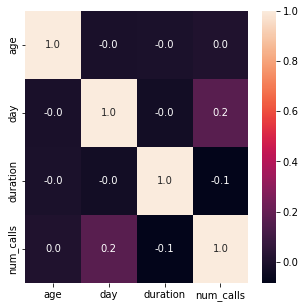

In [22]:
#lets check whether linear relationship exists between numeric fetures and target using pearson correlation coeff
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True, fmt='.1f')

**Check Feature Distribution**

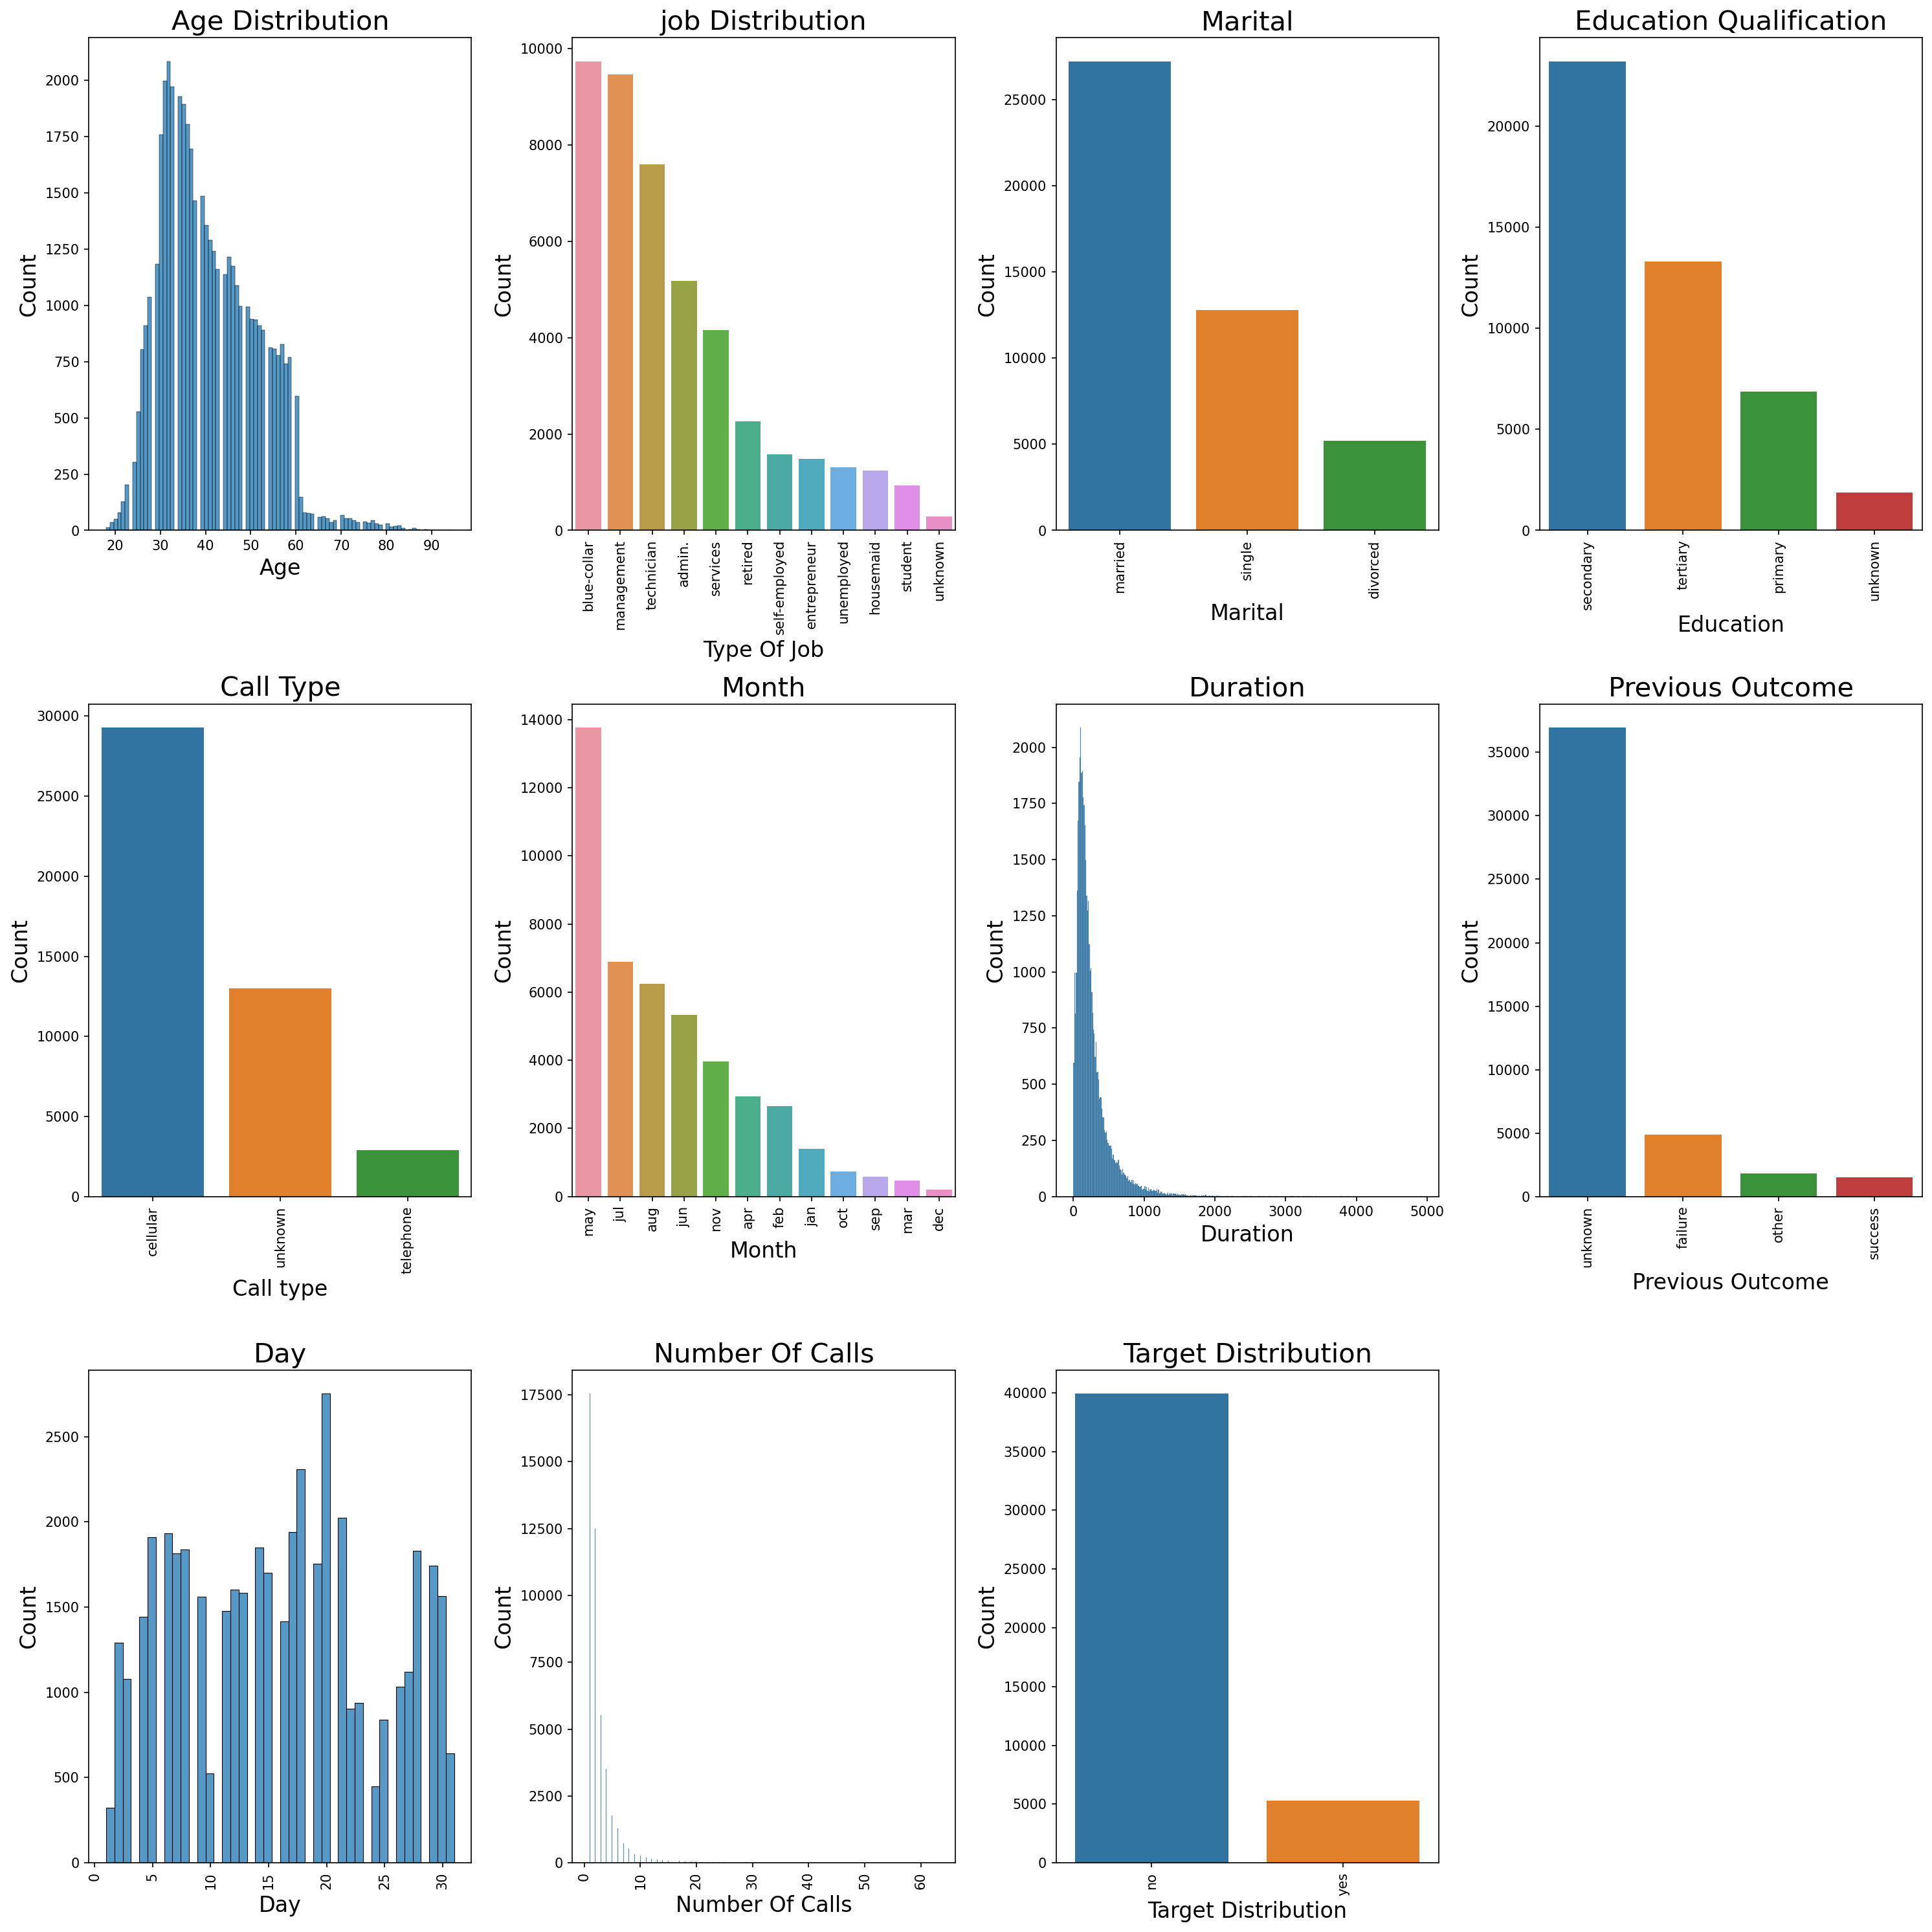

In [23]:
# Age distribution 
plt.figure(figsize = (20,20),dpi=150)  
plt.subplot(3,4,1) 
sns.histplot(df.age) 
plt.title('Age Distribution', fontsize = 20) 
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  
#Job distribution 
plt.subplot(3,4,2) 
sns.countplot(df['job'],order=df.job.value_counts().index) 
plt.title('job Distribution', fontsize = 20) 
plt.xlabel('Type Of Job',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
# Marital distribution 
plt.subplot(3,4,3) 
sns.countplot(df['marital'],order=df.marital.value_counts().index) 
plt.title('Marital', fontsize = 20) 
plt.xlabel('Marital',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
# Education qualification distribution 
plt.subplot(3,4,4) 
sns.countplot(df['education_qual'],order=df.education_qual.value_counts().index) 
plt.title('Education Qualification', fontsize = 20) 
plt.xlabel('Education',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16) 
 # Call type distribution 
plt.subplot(3,4,5) 
sns.countplot(df['call_type'],order=df.call_type.value_counts().index) 
plt.title('Call Type', fontsize = 20) 
plt.xlabel('Call type',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
 # Mon distribution 
plt.subplot(3,4,6) 
sns.countplot(df['month'],order=df.month.value_counts().index) 
plt.title('Month', fontsize = 20) 
plt.xlabel('Month',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
 # Dur distribution 
plt.subplot(3,4,7) 
sns.histplot(df.duration) 
plt.title('Duration', fontsize = 20) 
plt.xlabel('Duration',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  
 # Previous outcome  distribution  
plt.subplot(3,4,8) 
sns.countplot(df['prev_outcome'],order=df.prev_outcome.value_counts().index) 
plt.title('Previous Outcome', fontsize = 20) 
plt.xlabel('Previous Outcome',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  
# Day distribution 
plt.subplot(3,4,9) 
sns.histplot(df['day']) 
plt.title('Day', fontsize = 20) 
plt.xlabel('Day',fontsize = 16) 
plt.xticks(rotation = 90,fontsize = 10) 
plt.ylabel('Count',fontsize = 16)  
# Num call distribution 
plt.subplot(3,4,10) 
sns.histplot(df['num_calls']) 
plt.title('Number Of Calls', fontsize = 20) 
plt.xlabel('Number Of Calls',fontsize = 16) 
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  

 # Target distribution 
plt.subplot(3,4,11) 
sns.countplot(df['y']) 
plt.title('Target Distribution', fontsize = 20) 
plt.xlabel('Target Distribution',fontsize = 16)
plt.xticks(rotation = 90) 
plt.ylabel('Count',fontsize = 16)  

plt.tight_layout()
plt.show()

INTERPRETATION:
1. AGE 
  * Company targets 30 to 40 ages people to sell their insurance plan
  * People aged less than 25 years and more than 60 years are less targeted by the company for insurance 

2. JOB
  * Blue collar and management people are targeted most by insurance company
  * Students are least targeted for insurance plan

3. MARITAL STATUS
  * Married people are targeted the most and divorced people are least targeted 

4. EDUCATIONAL QUALIFICATION
  * Secondary qualified people have been targeted thye most for insurance followed by tertiary and primary

5. CALL_TYPE
  * Cellur mode is most used for contacting the people for campaign

6. Month
  * May month is when maxmium calls are generated for new insurance customers,december is the least no of calls placed by the company

7. Duration 
  * maximum number of calls lasted less than 1000 seconds

8. Previous Outcome
  * More unknown as status than failure and success

9. Day
  * Most number of calls are between in the mid of month

10. Number of Calls
  * Most People are contacted only 1 or 2 times by the company

11. Target
  * No of people subscribed is very less compared to Unsubcribed people

**Features vs Features**

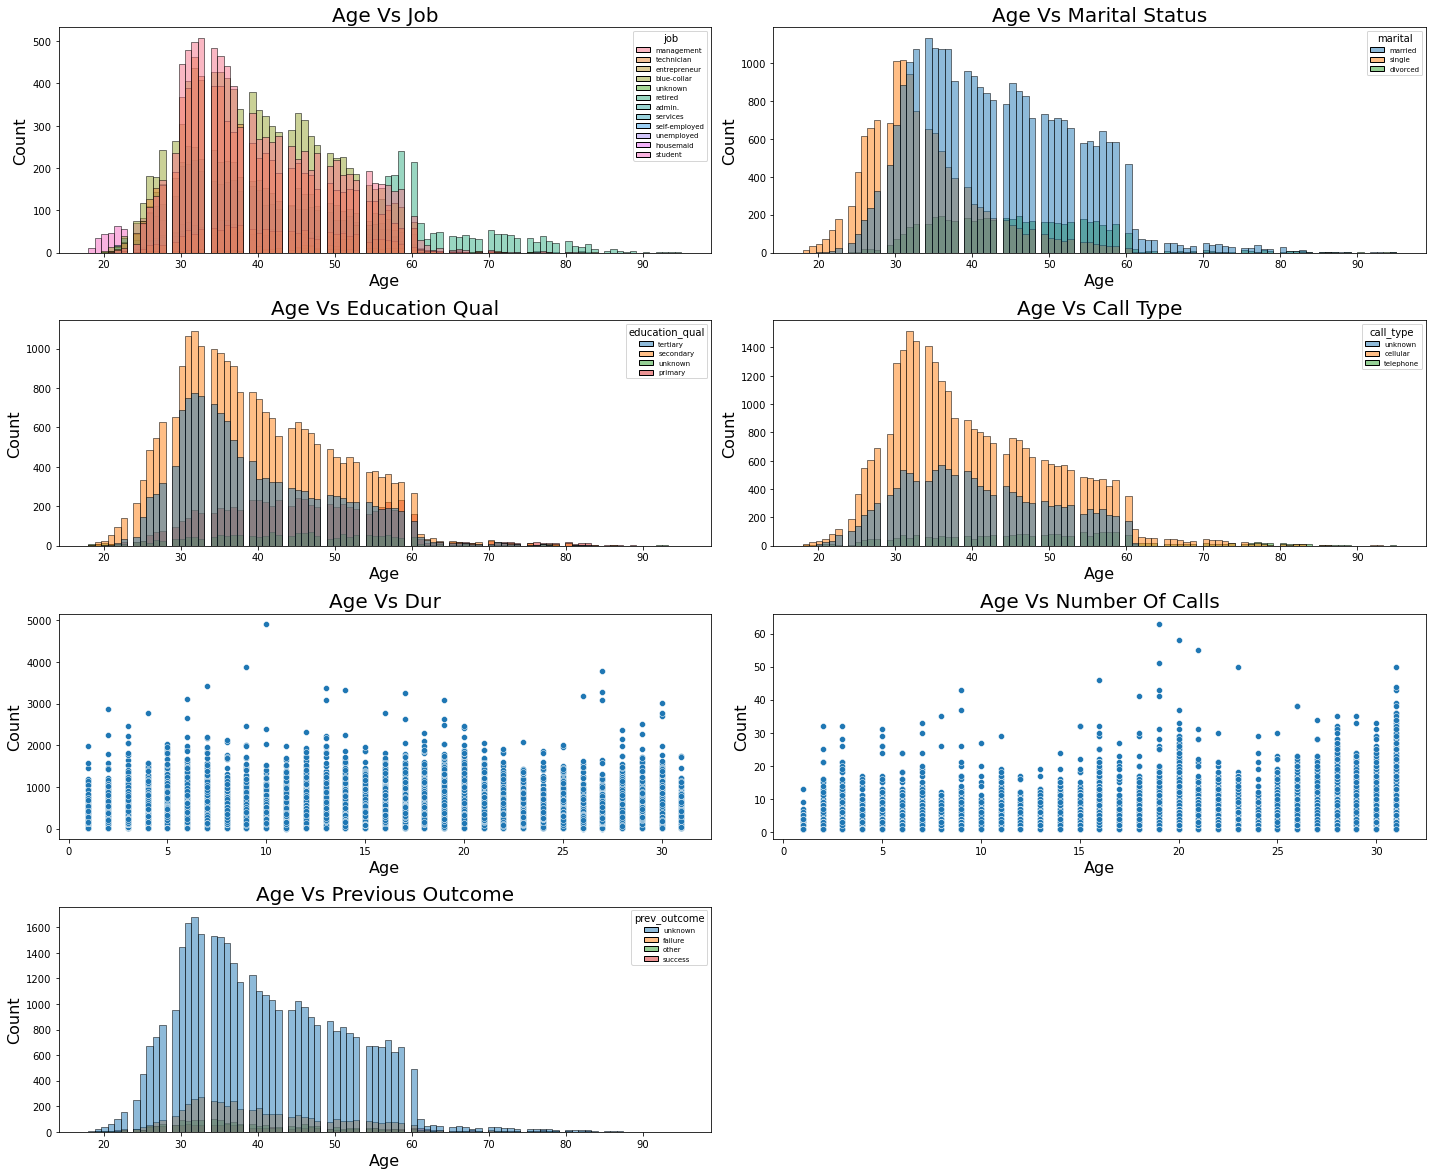

In [24]:
# Age vs job
plt.figure(figsize = (20,20))
plt.subplot(5,2,1)
ax = sns.histplot(x = 'age',hue = 'job',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Job',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)  

# Age vs marital
plt.subplot(5,2,2)
ax = sns.histplot(x = 'age',hue = 'marital',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Marital Status',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs education qual
plt.subplot(5,2,3)
ax = sns.histplot(x = 'age',hue = 'education_qual',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Education Qual',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs call type
plt.subplot(5,2,4)
ax = sns.histplot(x = 'age',hue = 'call_type',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Call Type',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs day
plt.subplot(5,2,5)
sns.scatterplot(x ='day' ,y = 'duration',data = df)
plt.title('Age Vs Dur',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs num calls
plt.subplot(5,2,6)
sns.scatterplot(x ='day' ,y = 'num_calls',data = df)
plt.title('Age Vs Number Of Calls',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16) 

# Age vs previous outcome
plt.subplot(5,2,7)
ax = sns.histplot(x = 'age',hue = 'prev_outcome',data = df)
sns.move_legend(ax,"upper right",fontsize = 7)
plt.title('Age Vs Previous Outcome',fontsize = 20)
plt.xlabel('Age',fontsize = 16) 
plt.ylabel('Count',fontsize = 16)


plt.tight_layout()
plt.show()

**Plotting of Numerical data vs Target**

Here we are plotting all our Numerical columns with target to figure out, is there any relation between numerical features column. Here we plot 2 type of numerical data:

* Continous variable
* discrete variable


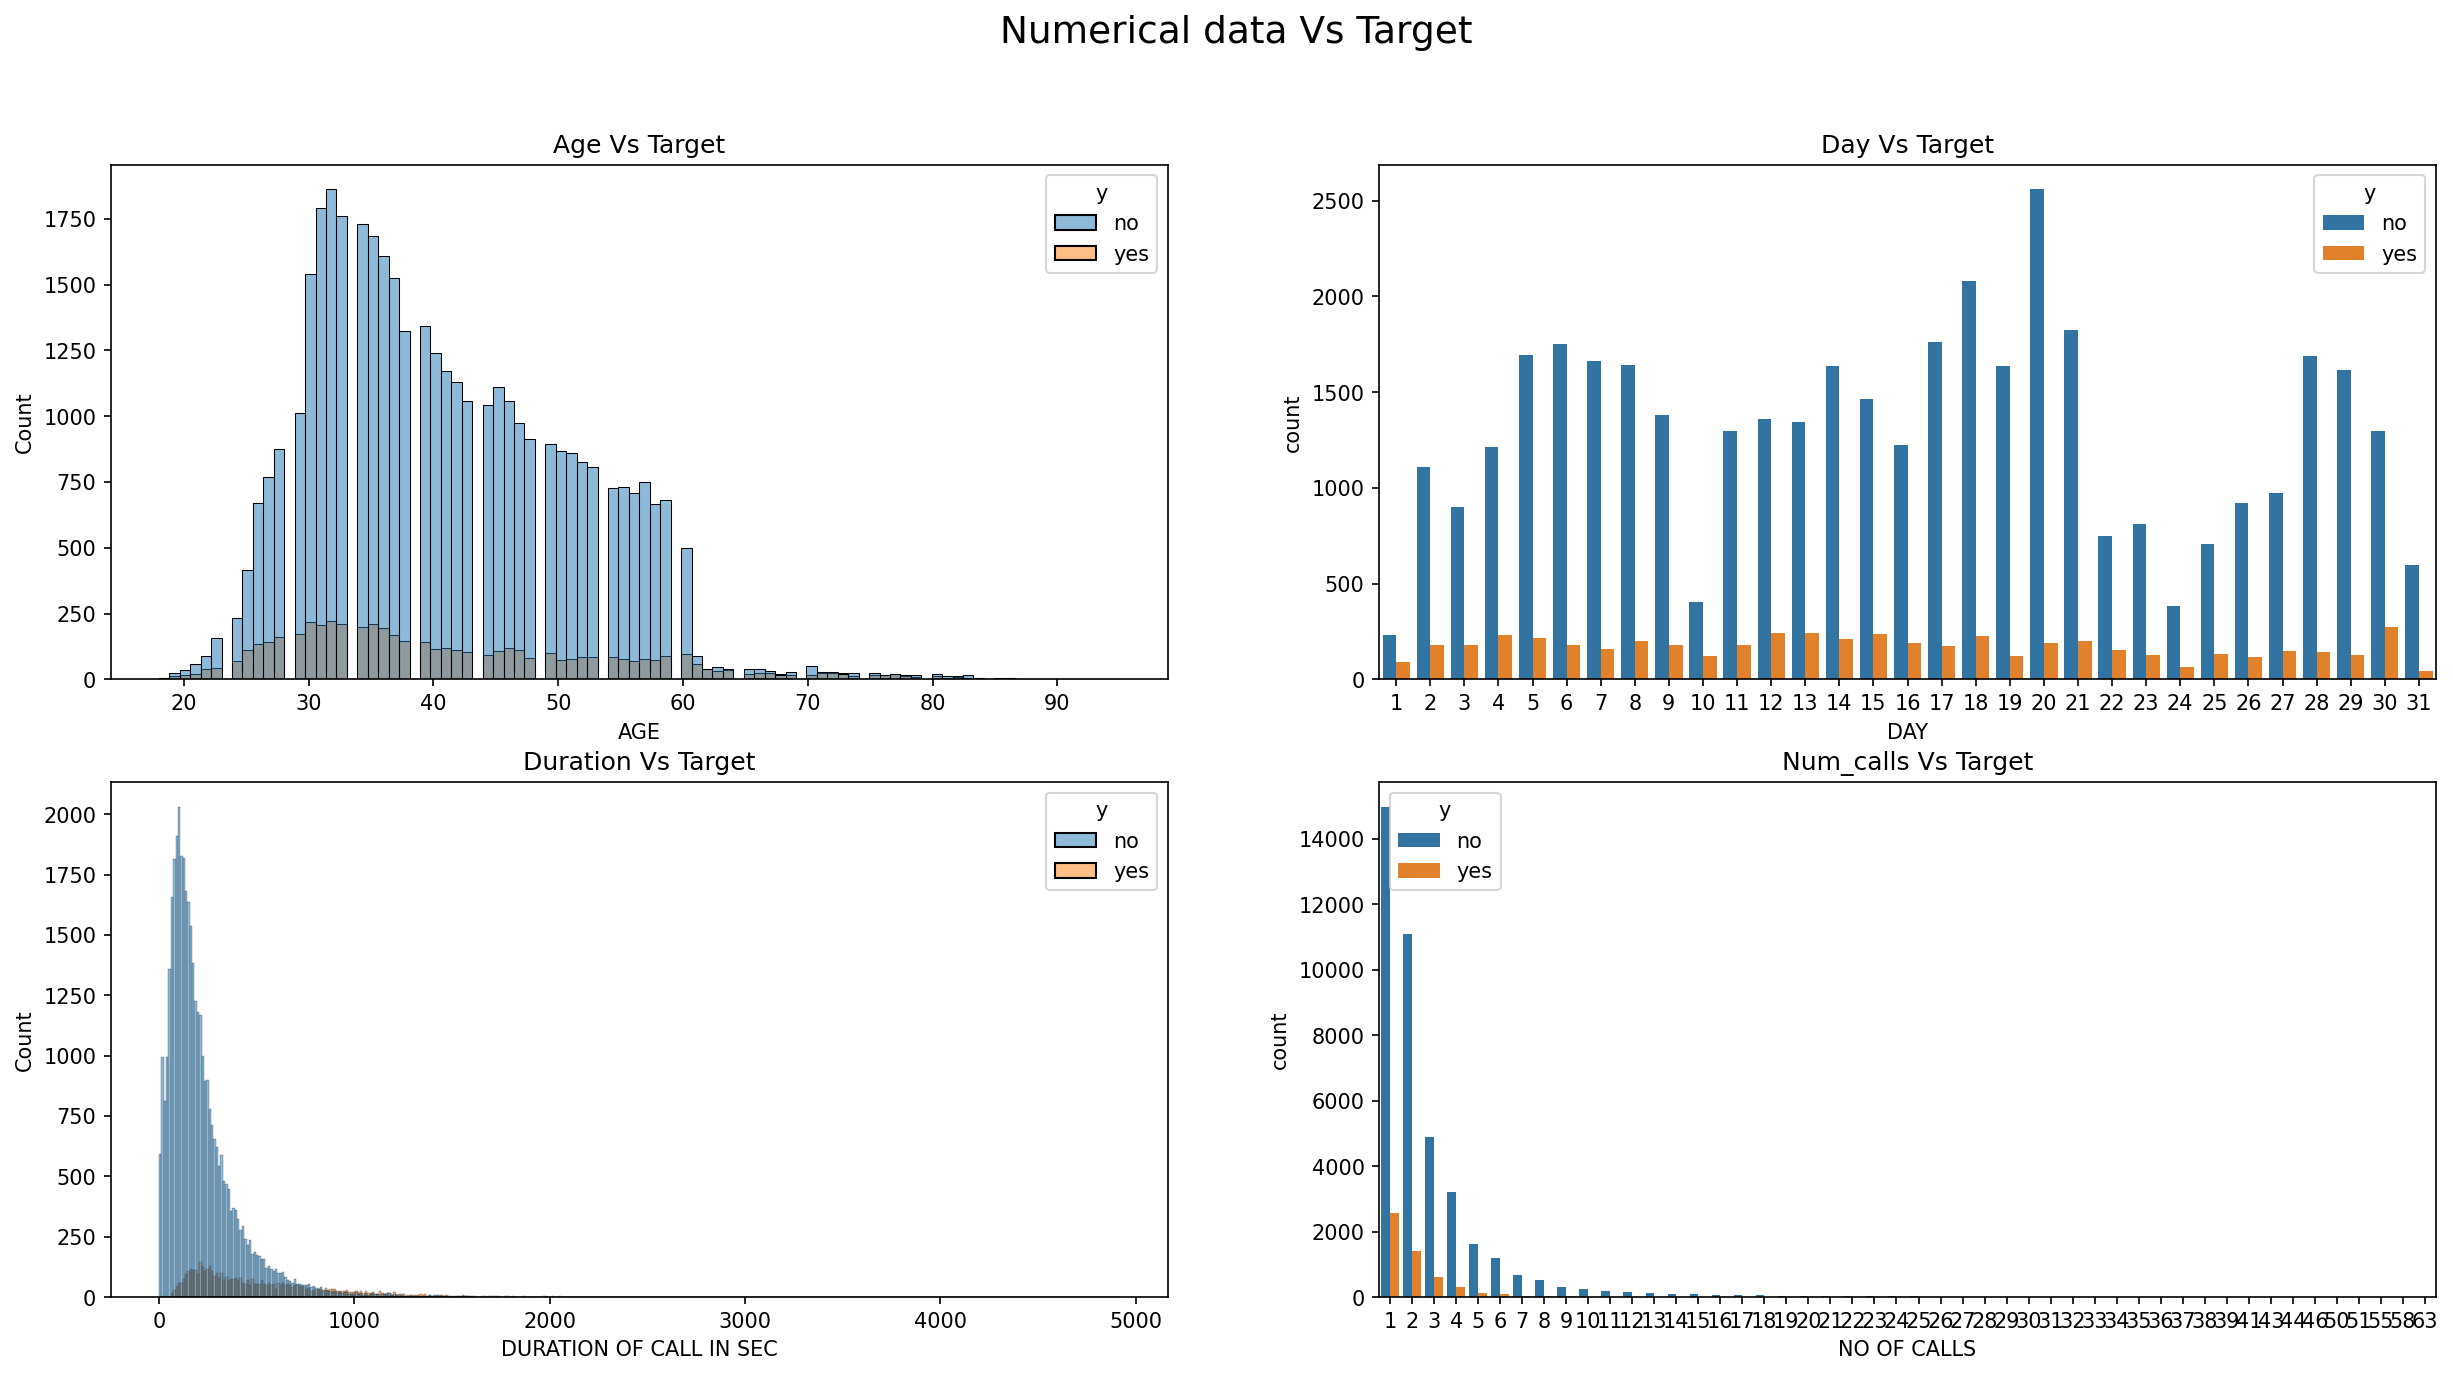

In [25]:
plt.figure(figsize=(20, 10), dpi=150)
plt.subplot(2,2,1)
sns.histplot(x='age',hue='y',data=df)
plt.title("Age Vs Target",)
plt.xlabel("AGE")

plt.subplot(2,2,2)
sns.countplot(x='day',hue='y',data=df)
plt.title("Day Vs Target")
plt.xlabel("DAY")

plt.subplot(2,2,3)
sns.histplot(x='duration',hue='y',data=df)
plt.title("Duration Vs Target")
plt.xlabel("DURATION OF CALL IN SEC")

plt.subplot(2,2,4)
sns.countplot(x='num_calls',hue='y',data=df)
plt.title("Num_calls Vs Target")
plt.xlabel("NO OF CALLS")

plt.suptitle("Numerical data Vs Target", fontsize=18)  #suptitle to show title for overall plot 
plt.show()

INTERPRETATION:

1. AGE VS TARGET

* 



**Categorical Columns**

Plotting of Categorical data vs Target



From the above plot 
* we can see Blue collar JOb type person have been contacted the most and 

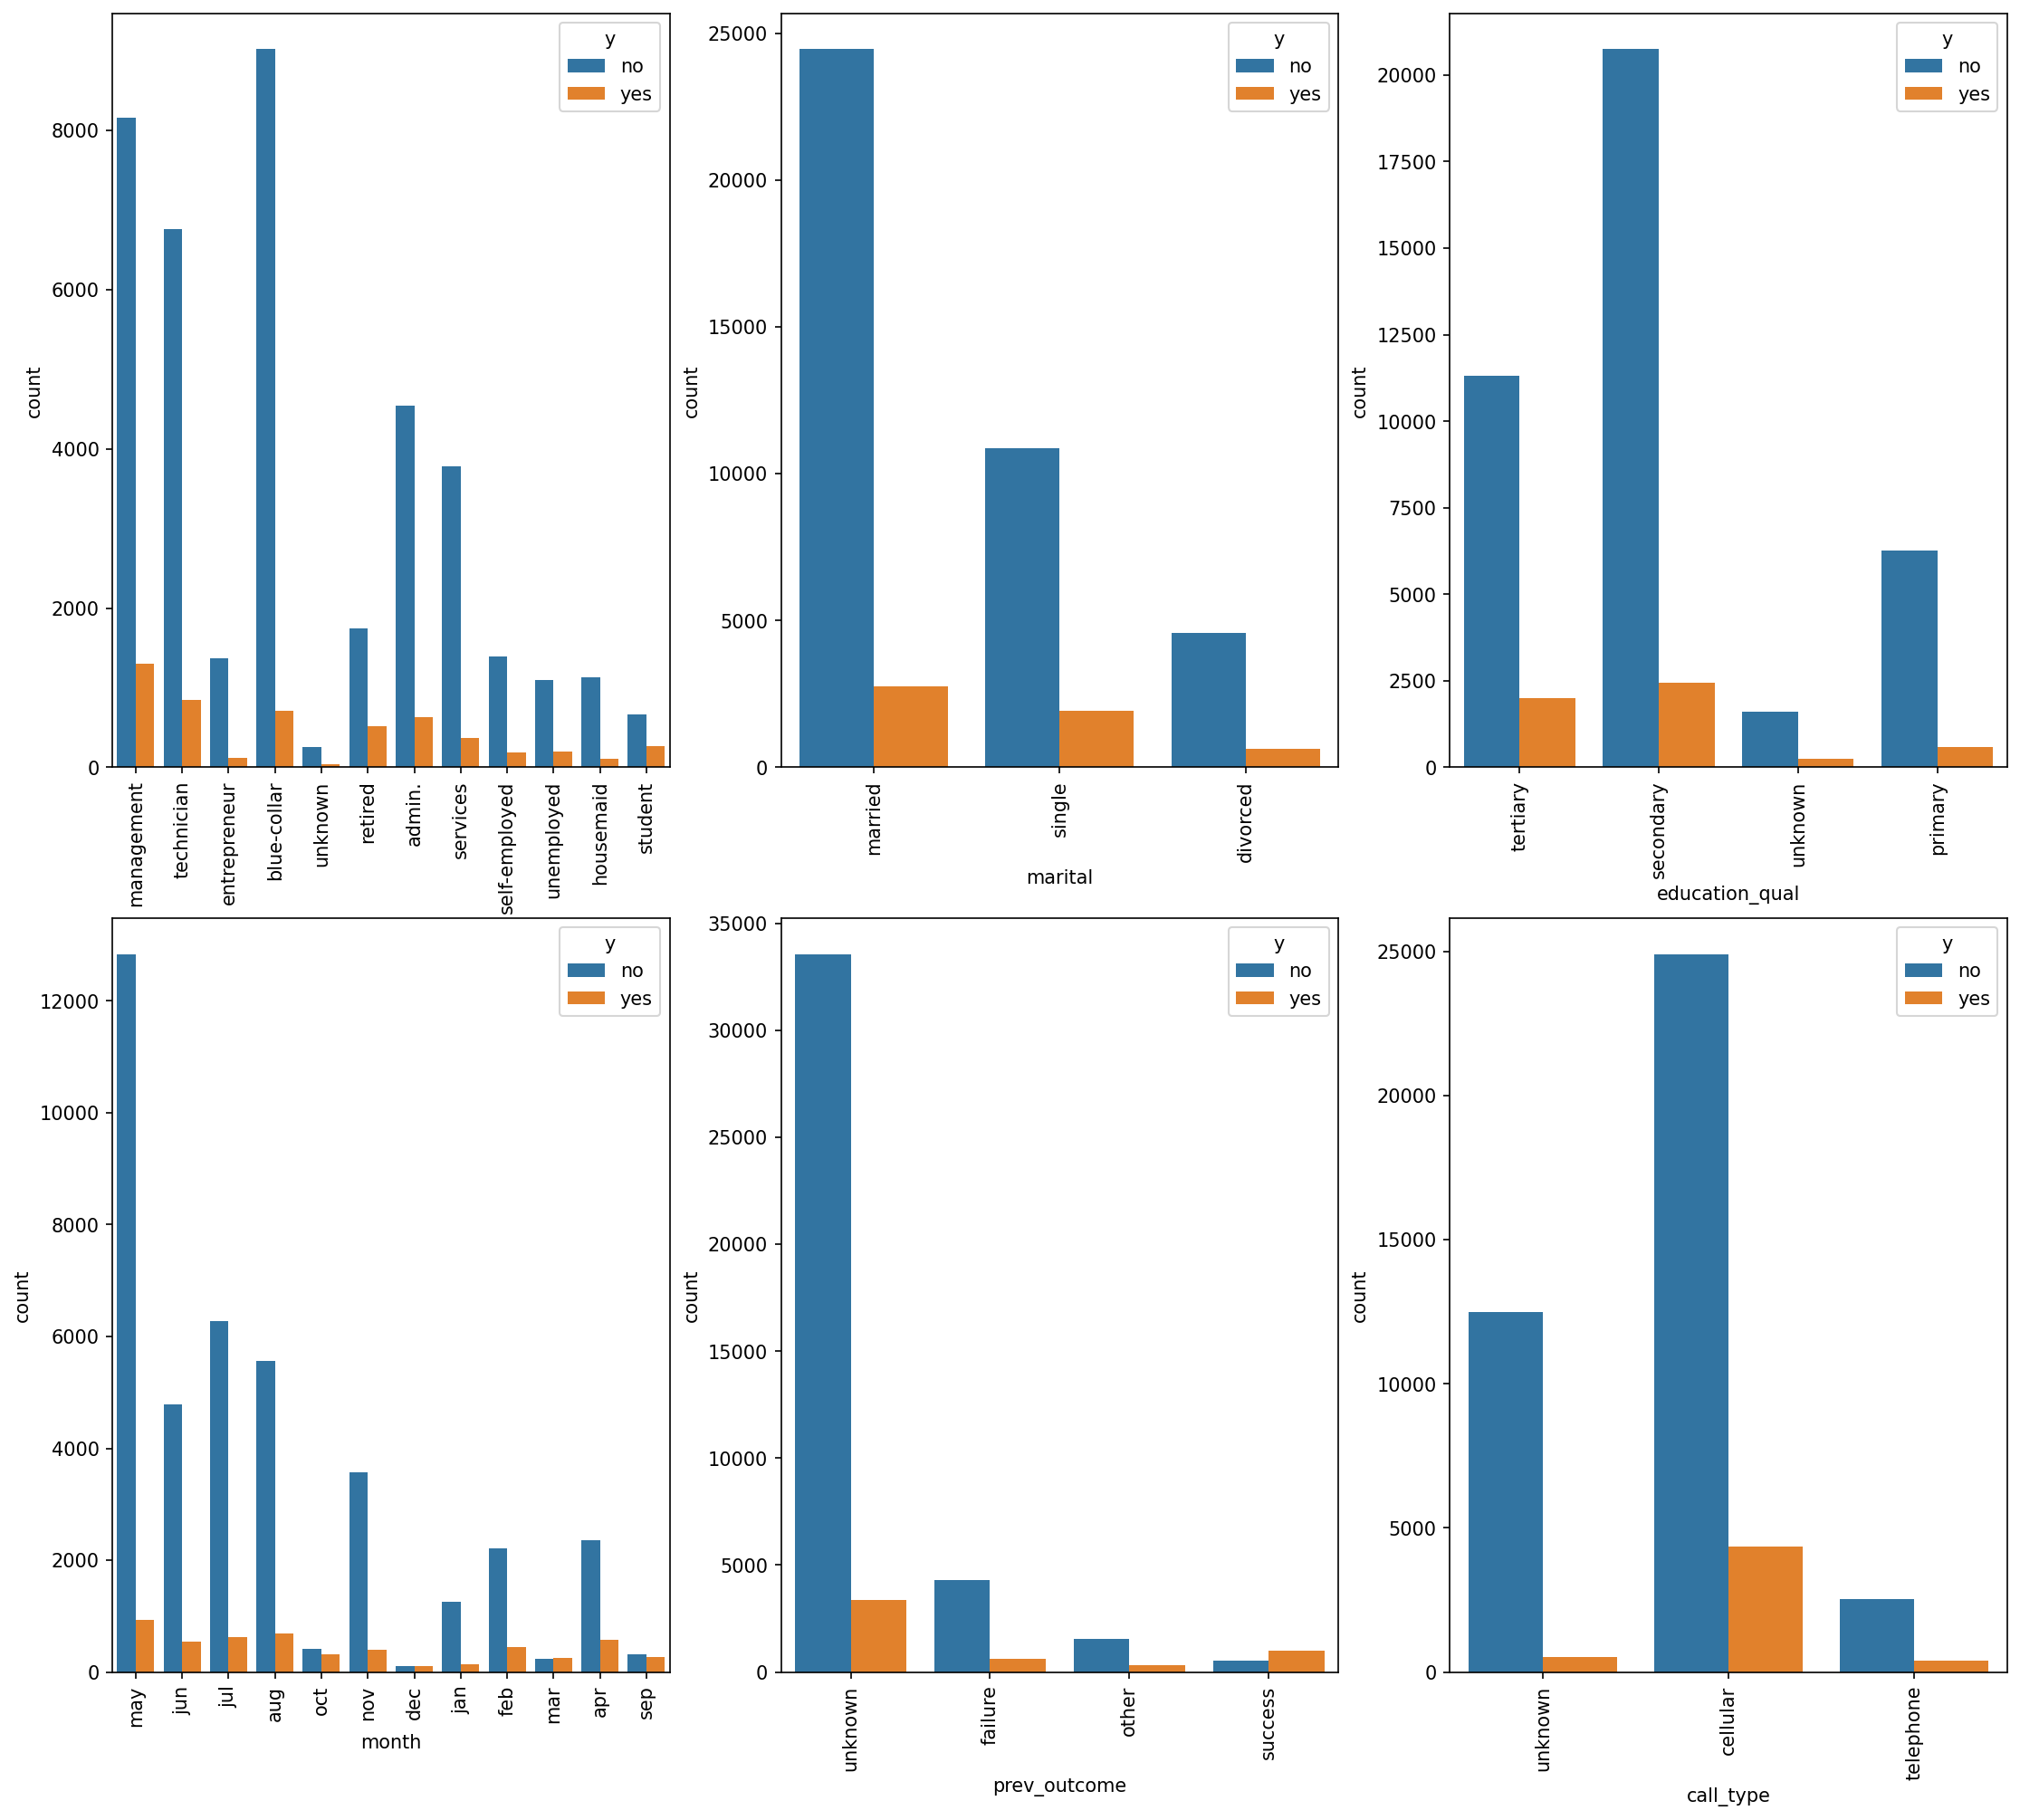

In [26]:

plt.figure(figsize=(18,25), dpi=150)

plt.subplot(3,3,1)
sns.countplot(x='job',hue='y',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,2)
sns.countplot(x='marital',hue='y',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,3)
sns.countplot(x='education_qual',hue='y',data=df)
plt.xticks(rotation=90)


plt.subplot(3,3,4)
sns.countplot(x='month',hue='y',data=df)
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.countplot(x='prev_outcome',hue='y',data=df)
plt.xticks(rotation=90)


plt.subplot(3,3,6)
sns.countplot(x='call_type',hue='y',data=df)
plt.xticks(rotation=90)

plt.show()

Interpretation:
1. 

# Data Encoding

In [27]:
n_df = df.copy()

In [28]:
n_df = pd.get_dummies(n_df,columns=['job'],drop_first=True)

In [29]:
n_df['marital'] = n_df['marital'].map({'married':0,'single':1,'divorced':2})

In [30]:
n_df['education_qual'] = n_df['education_qual'].map({'secondary':0,'primary':2,'tertiary':1,'unknown':3})

In [31]:
n_df['call_type']= n_df['call_type'].map({'cellular':0,'unknown':1,'telephone':2})

In [32]:
n_df = pd.get_dummies(n_df,columns=['month'],drop_first=True)

In [33]:
n_df = pd.get_dummies(n_df,columns=['prev_outcome'],drop_first=True)

In [34]:
n_df['y'] = n_df['y'].map({'no':0,'yes':1})

In [35]:
n_df.head()

,age,marital,education_qual,call_type,day,duration,num_calls,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,0,1,1,5,261,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,1,0,1,5,151,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,0,1,5,76,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,0,3,1,5,92,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,3,1,5,198,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [36]:
X = n_df.drop('y',axis = 1)
y = n_df['y']

**Splitting The data**

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# Balance The Data And Model Building With Outliers Data

In [38]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)

# Data Scaling

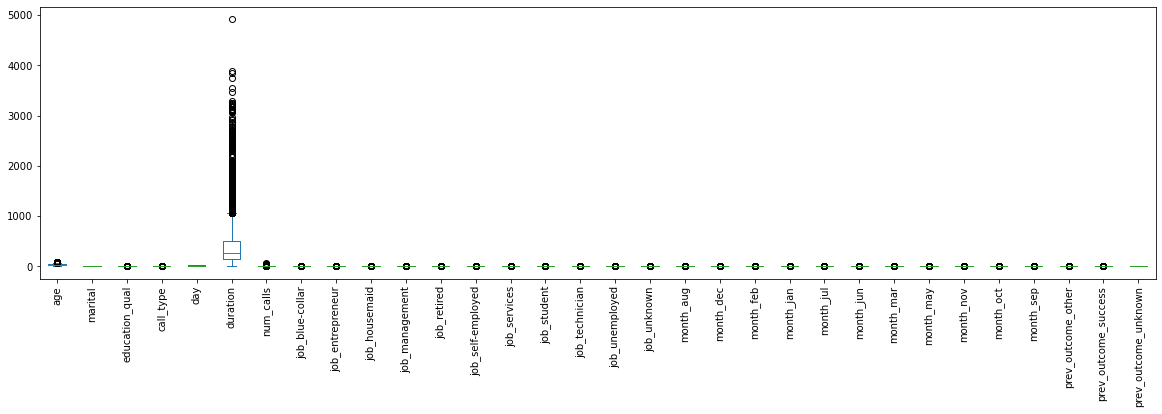

In [39]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()  #lets scale  the datasets

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [42]:
from sklearn.metrics import roc_auc_score
log_reg_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for logistic regression  :  ",round(log_reg_auroc,2))

auroc score for logistic regression  :   0.7


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

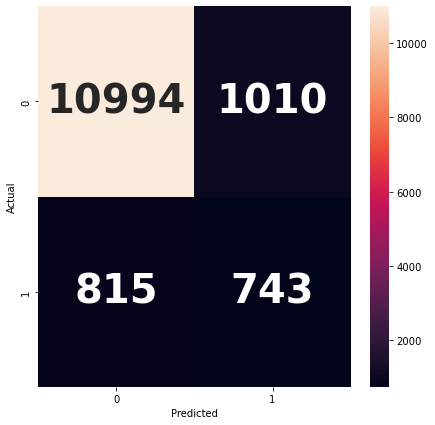

In [43]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d') 

# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
#doing cross validation to identify best value of K 
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20]:  #for each k value finding the auroc 
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  trainAccuracy = roc_auc_score(y_train, knn.predict(X_train))
  print("K value  : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1 Train accuracy : 1.0  cross val score :  0.9095264017419705
K value  :  2 Train accuracy : 0.9610778443113772  cross val score :  0.9091453456722919
K value  :  3 Train accuracy : 0.9524768644529124  cross val score :  0.9123571039738703
K value  :  4 Train accuracy : 0.9440936309199783  cross val score :  0.9108328796951553
K value  :  5 Train accuracy : 0.9412810742152059  cross val score :  0.9123208129196152
K value  :  6 Train accuracy : 0.9367446924333152  cross val score :  0.911213935764834
K value  :  7 Train accuracy : 0.9352386136817274  cross val score :  0.912538559245146
K value  :  8 Train accuracy : 0.9326075122482308  cross val score :  0.9106151333696243
K value  :  9 Train accuracy : 0.93164579931047  cross val score :  0.9111594991834512
K value  :  10 Train accuracy : 0.9287606604971873  cross val score :  0.9097622935946289
K value  :  20 Train accuracy : 0.9190346579568137  cross val score :  0.9070041734712394


In [46]:
# at k=10 we get good cross val score 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)  #initialized 
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [47]:
y_pred=classifier.predict(X_test)

In [48]:
roc_auc_score(y_test,y_pred)

0.6564423968219408

In [49]:
from sklearn.metrics import roc_auc_score
KNN_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for KNN  :  ",round(KNN_auroc,2))

auroc score for KNN  :   0.66


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

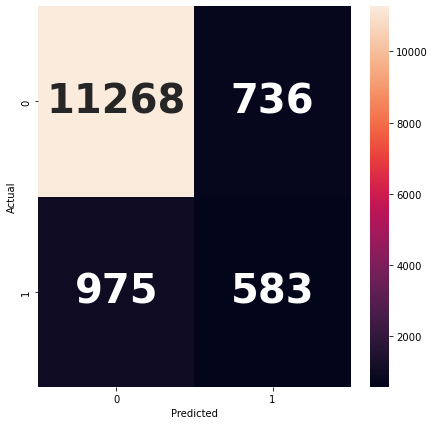

In [50]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Decision Tree

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7224823081110506  Cross val score :  0.7220468154599892
Depth  :  2  Training Accuracy :  0.7673380511703864  Cross val score :  0.7682271819996371
Depth  :  3  Training Accuracy :  0.8114316820903648  Cross val score :  0.8121212121212121
Depth  :  4  Training Accuracy :  0.8364362184721467  Cross val score :  0.8364543639992743
Depth  :  5  Training Accuracy :  0.8555071674832153  Cross val score :  0.8543821448013065
Depth  :  6  Training Accuracy :  0.8759934676102341  Cross val score :  0.8704953728905824
Depth  :  7  Training Accuracy :  0.8923062964979133  Cross val score :  0.8849755035383777
Depth  :  8  Training Accuracy :  0.9101614951914352  Cross val score :  0.8988023952095807
Depth  :  9  Training Accuracy :  0.9209580838323354  Cross val score :  0.905280348394121
Depth  :  10  Training Accuracy :  0.9294320450009073  Cross val score :  0.9056614044637998


In [53]:
#lets us fit the model with max_depth =5 it seems more of genralised model   in depth>5 we see overfitted model 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [54]:
y_pred = dt.predict(X_test)

In [55]:
from sklearn.metrics import roc_auc_score
dt_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for decision tree  :  ",round(dt_auroc,3))

auroc score for decision tree  :   0.781


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

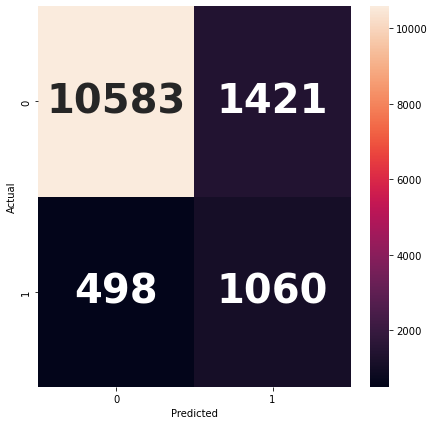

In [56]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [58]:
y_pred= rf.predict(X_test)

In [59]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, rf.predict(X_train)) # this is useless information - i am showing to prove a point
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8227726365450917  Cross val score :  0.825458174559971
Depth  :  2  Training Accuracy :  0.8450553438577391  Cross val score :  0.8442932317183814
Depth  :  3  Training Accuracy :  0.858682634730539  Cross val score :  0.8584467428778806
Depth  :  4  Training Accuracy :  0.8675920885501723  Cross val score :  0.8690074396661223
Depth  :  5  Training Accuracy :  0.8836145890038105  Cross val score :  0.8772092179277807
Depth  :  6  Training Accuracy :  0.8970604246053347  Cross val score :  0.8866086009798584
Depth  :  7  Training Accuracy :  0.8995282162946833  Cross val score :  0.893104699691526
Depth  :  8  Training Accuracy :  0.9121756487025948  Cross val score :  0.9003447650154237
Depth  :  9  Training Accuracy :  0.9230811105062602  Cross val score :  0.9057521320994374
Depth  :  10  Training Accuracy :  0.9273816004354928  Cross val score :  0.9102885138813284


In [60]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [61]:
y_pred=rf.predict(X_test)

In [62]:
from sklearn.metrics import roc_auc_score
rf_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc,2))

auroc score for random forest classifier   :   0.77


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

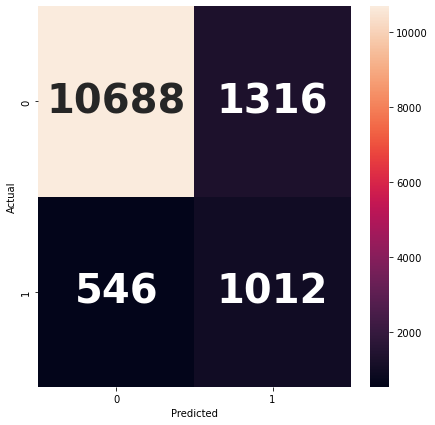

In [63]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [64]:
input_cols=df.columns.to_list()[0:10]

In [65]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(input_cols, importances)]  #input_cols=column names as list

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: day                  Importance: 0.31
Variable: education_qual       Importance: 0.06
Variable: duration             Importance: 0.06
Variable: month                Importance: 0.03
Variable: age                  Importance: 0.02
Variable: job                  Importance: 0.01
Variable: marital              Importance: 0.01
Variable: call_type            Importance: 0.01
Variable: num_calls            Importance: 0.0
Variable: prev_outcome         Importance: 0.0


In [66]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [67]:
y_pred=rf.predict(X_test)

In [68]:
from sklearn.metrics import roc_auc_score
rf_auroc1=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc1,2))

auroc score for random forest classifier   :   0.78


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

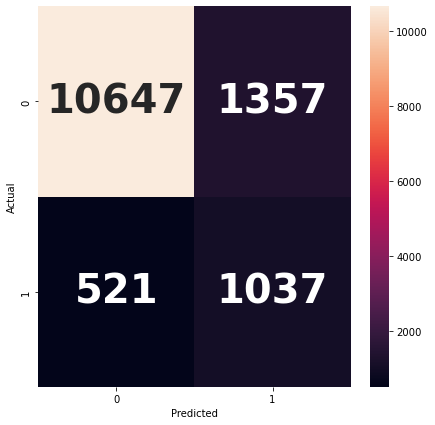

In [69]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# XG Boost

In [70]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.15,0.2,0.5,0.7,1]:  #cross validation for learning rate 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train)
  print("Learning rate : ", lr," Train score : ", roc_auc_score(y_train, model.predict(X_train))," Cross-Val score : ", np.mean(cross_val_score(model,X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.8943748865904555  Cross-Val score :  0.8857013246234802
Learning rate :  0.02  Train score :  0.9122663763382325  Cross-Val score :  0.9022137543095626
Learning rate :  0.03  Train score :  0.9233895844674288  Cross-Val score :  0.9117038649972782
Learning rate :  0.04  Train score :  0.9300127018689893  Cross-Val score :  0.9155144256940664
Learning rate :  0.05  Train score :  0.9333151878062057  Cross-Val score :  0.9173289784068228
Learning rate :  0.1  Train score :  0.9427145708582834  Cross-Val score :  0.9211576846307384
Learning rate :  0.11  Train score :  0.9452186536018871  Cross-Val score :  0.9218835057158412
Learning rate :  0.12  Train score :  0.945055343857739  Cross-Val score :  0.9219560878243513
Learning rate :  0.15  Train score :  0.947795318454001  Cross-Val score :  0.9227000544365813
Learning rate :  0.2  Train score :  0.9526764652513156  Cross-Val score :  0.9246053347849754
Learning rate :  0.5  Train score :  0.97045

In [71]:
model = xgb.XGBClassifier(learning_rate =0.08, n_estimators=100)  #at lr=0.08 model is more generalized
model.fit(X_train,y_train) #train the model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [72]:
y_pred=model.predict(X_test)

In [73]:
from sklearn.metrics import roc_auc_score
xg_auroc=roc_auc_score(y_test,y_pred)  #handles predicted probaility 
print("auroc score for xg boost   :  ",round(xg_auroc,2))  #we get 0.99 very good auroc score

auroc score for xg boost   :   0.78


In [74]:
from sklearn.metrics import  confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

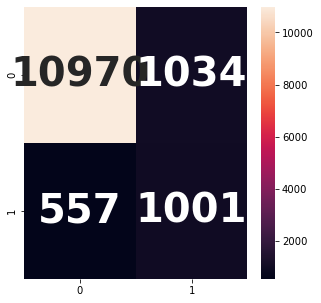

In [75]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [76]:
bin_class=pd.DataFrame({"Model":["Logistic regression","KNN","Decision Tree","Random Forest","XGboost"],
                       "auroc":[log_reg_auroc,KNN_auroc,dt_auroc,rf_auroc,xg_auroc]})

In [77]:
print("Models and their evaluations")
print("\n")
bin_class.sort_values(["auroc"],ascending=False)

Models and their evaluations




,Model,auroc
2,Decision Tree,0.780991
4,XGboost,0.778176
3,Random Forest,0.769960
0,Logistic regression,0.696377
1,KNN,0.656442


# Model Building Without Outliers

In [78]:
df2=n_df[(n_df["age"].isin(age)) & (n_df["duration"].isin(dur)) & (n_df["num_calls"].isin(num_calls))]

In [79]:
X = df2.drop('y',axis = 1)
y = df2['y']

**Spliting The Data**

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# Balance The Data And Model Building For Without Outliers

In [81]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)

# Data Scaling

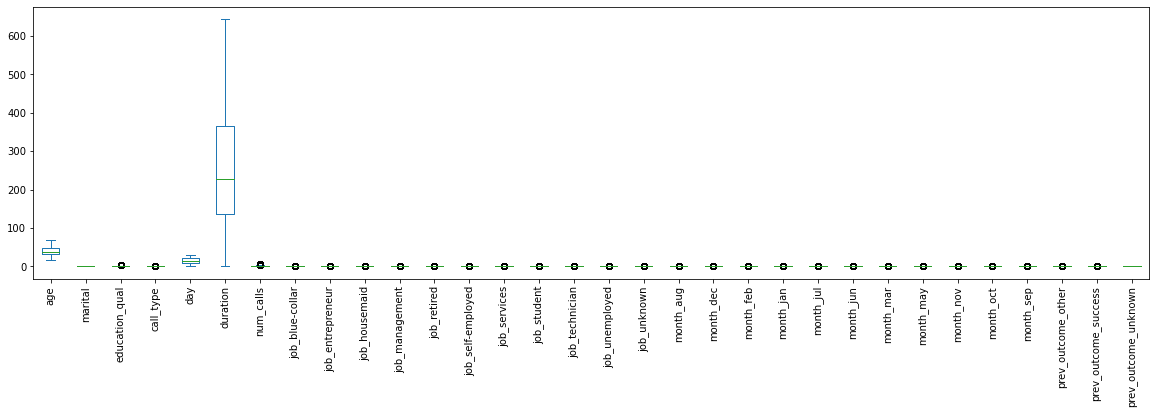

In [82]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()  #lets scale  the datasets

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [85]:
from sklearn.metrics import roc_auc_score
log_reg_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for logistic regression  :  ",round(log_reg_auroc,2))

auroc score for logistic regression  :   0.66


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

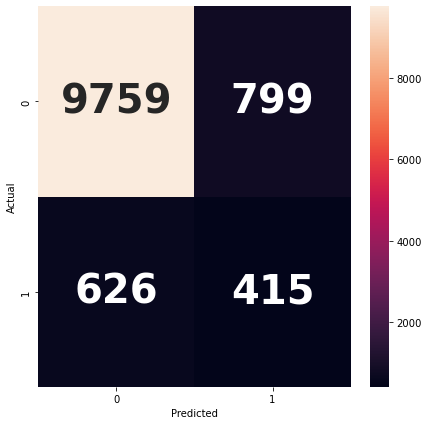

In [86]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d') 

# KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
#doing cross validation to identify best value of K 
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20]:  #for each k value finding the auroc 
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  trainAccuracy = roc_auc_score(y_train, knn.predict(X_train))
  print("K value  : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1 Train accuracy : 0.9999795860041645  cross val score :  0.9243892283581179
K value  :  2 Train accuracy : 0.972012411709468  cross val score :  0.9319017864413626
K value  :  3 Train accuracy : 0.9620299677458866  cross val score :  0.929308966396839
K value  :  4 Train accuracy : 0.9572326787245335  cross val score :  0.9315546934979189
K value  :  5 Train accuracy : 0.9530273955824113  cross val score :  0.9293702033839791
K value  :  6 Train accuracy : 0.9510268239905278  cross val score :  0.9299827857969862
K value  :  7 Train accuracy : 0.9488425264361245  cross val score :  0.9283698659012503
K value  :  8 Train accuracy : 0.9470869227942679  cross val score :  0.9289007573232461
K value  :  9 Train accuracy : 0.9452292491732333  cross val score :  0.9277778750190351
K value  :  10 Train accuracy : 0.9442289633772915  cross val score :  0.927716713046579
K value  :  20 Train accuracy : 0.9359000530763892  cross val score :  0.9259406778876966


In [89]:
# at k=10 we get good cross val score 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)  #initialized 
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [90]:
y_pred=classifier.predict(X_test)

In [91]:
roc_auc_score(y_test,y_pred)

0.6585537115415165

In [92]:
from sklearn.metrics import roc_auc_score
KNN_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for KNN  :  ",round(KNN_auroc,2))

auroc score for KNN  :   0.66


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

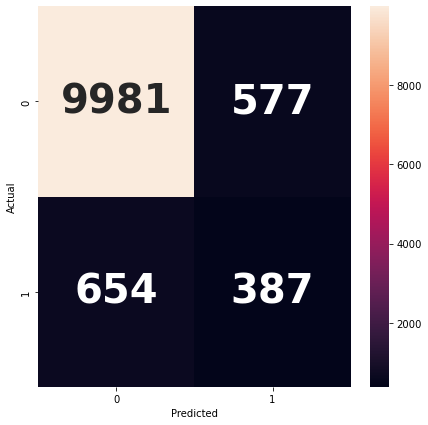

In [93]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Decision Tree

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7468256236475728  Cross val score :  0.7468267913444055
Depth  :  2  Training Accuracy :  0.7997795288449762  Cross val score :  0.7995968502501031
Depth  :  3  Training Accuracy :  0.8256440615686114  Cross val score :  0.8255636582527697
Depth  :  4  Training Accuracy :  0.8395868207242887  Cross val score :  0.8393433306236362
Depth  :  5  Training Accuracy :  0.8486506348752705  Cross val score :  0.846120924004207
Depth  :  6  Training Accuracy :  0.8700036745192504  Cross val score :  0.8665348575316951
Depth  :  7  Training Accuracy :  0.8854570693667578  Cross val score :  0.8789875451452955
Depth  :  8  Training Accuracy :  0.907116318948271  Cross val score :  0.8956247602134786
Depth  :  9  Training Accuracy :  0.9218552239415343  Cross val score :  0.9075872643736679
Depth  :  10  Training Accuracy :  0.9346343853345854  Cross val score :  0.9161204680816271


In [96]:
#lets us fit the model with max_depth =5 it seems more of genralised model   in depth>5 we see overfitted model 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [97]:
y_pred = dt.predict(X_test)

In [98]:
from sklearn.metrics import roc_auc_score
dt_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for decision tree  :  ",round(dt_auroc,3))

auroc score for decision tree  :   0.766


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

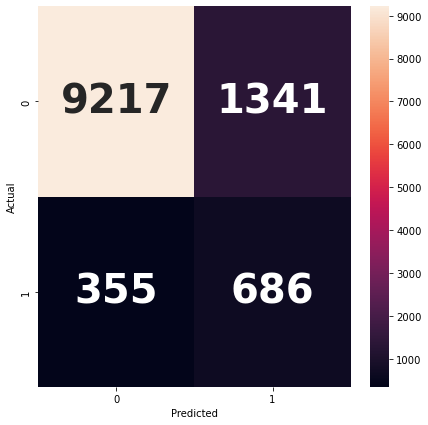

In [99]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [101]:
y_pred= rf.predict(X_test)

In [102]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, rf.predict(X_train)) # this is useless information - i am showing to prove a point
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8065161474707059  Cross val score :  0.839751189628703
Depth  :  2  Training Accuracy :  0.8575103090678968  Cross val score :  0.8500804657511708
Depth  :  3  Training Accuracy :  0.864104029722778  Cross val score :  0.860328909384012
Depth  :  4  Training Accuracy :  0.8786592087535213  Cross val score :  0.871781255347401
Depth  :  5  Training Accuracy :  0.8875597109378188  Cross val score :  0.8850097489916985
Depth  :  6  Training Accuracy :  0.8979708488139467  Cross val score :  0.8947471134141175
Depth  :  7  Training Accuracy :  0.9106071122361491  Cross val score :  0.9041172517853704
Depth  :  8  Training Accuracy :  0.9201404482913486  Cross val score :  0.911037681459479
Depth  :  9  Training Accuracy :  0.9282652186338953  Cross val score :  0.9185908141518702
Depth  :  10  Training Accuracy :  0.93649205895562  Cross val score :  0.9247559043016004


In [103]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [104]:
y_pred=rf.predict(X_test)

In [105]:
from sklearn.metrics import roc_auc_score
rf_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc,2))

auroc score for random forest classifier   :   0.75


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

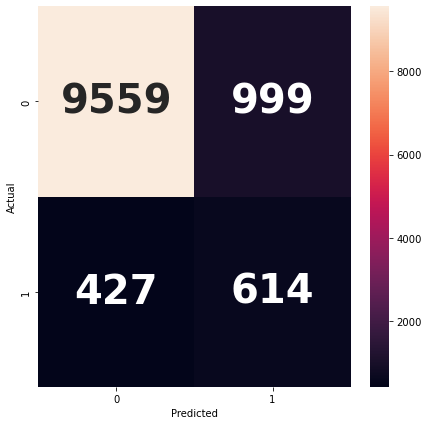

In [106]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [107]:
input_cols=df.columns.to_list()[0:10]

In [108]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(input_cols, importances)]  #input_cols=column names as list

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: day                  Importance: 0.18
Variable: education_qual       Importance: 0.08
Variable: duration             Importance: 0.07
Variable: month                Importance: 0.04
Variable: age                  Importance: 0.01
Variable: job                  Importance: 0.01
Variable: marital              Importance: 0.01
Variable: call_type            Importance: 0.01
Variable: num_calls            Importance: 0.0
Variable: prev_outcome         Importance: 0.0


In [109]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [110]:
y_pred=rf.predict(X_test)

In [111]:
from sklearn.metrics import roc_auc_score
rf_auroc1=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc1,2))

auroc score for random forest classifier   :   0.76


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

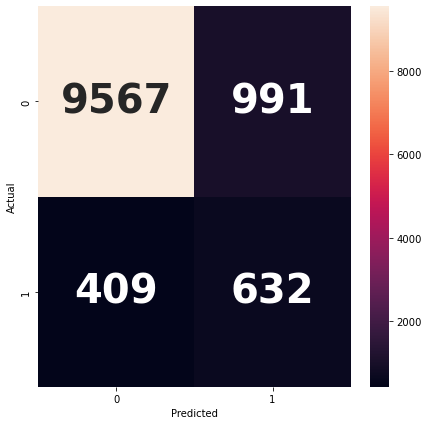

In [112]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# XG Boost

In [113]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.15,0.2,0.5,0.7,1]:  #cross validation for learning rate 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train)
  print("Learning rate : ", lr," Train score : ", roc_auc_score(y_train, model.predict(X_train))," Cross-Val score : ", np.mean(cross_val_score(model,X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.9066876250357245  Cross-Val score :  0.8997485549462974
Learning rate :  0.02  Train score :  0.9247540113501818  Cross-Val score :  0.9158145415298378
Learning rate :  0.03  Train score :  0.9384518025558323  Cross-Val score :  0.9280424893172838
Learning rate :  0.04  Train score :  0.9431061936063366  Cross-Val score :  0.9313497325434786
Learning rate :  0.05  Train score :  0.946719470869228  Cross-Val score :  0.9333708115030184
Learning rate :  0.1  Train score :  0.9552933491201567  Cross-Val score :  0.934718537820445
Learning rate :  0.11  Train score :  0.9568243988078226  Cross-Val score :  0.9346777048273867
Learning rate :  0.12  Train score :  0.9585391744580084  Cross-Val score :  0.9346982005060825
Learning rate :  0.15  Train score :  0.9602131221165232  Cross-Val score :  0.935351495055157
Learning rate :  0.2  Train score :  0.9647654431878496  Cross-Val score :  0.936168175753737
Learning rate :  0.5  Train score :  0.9810762

In [114]:
model = xgb.XGBClassifier(learning_rate =0.08, n_estimators=100)  #at lr=0.08 model is more generalized
model.fit(X_train,y_train) #train the model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [115]:
y_pred=model.predict(X_test)

In [116]:
from sklearn.metrics import roc_auc_score
xg_auroc=roc_auc_score(y_test,y_pred)  #handles predicted probaility 
print("auroc score for xg boost   :  ",round(xg_auroc,2))  #we get 0.99 very good auroc score

auroc score for xg boost   :   0.76


In [117]:
from sklearn.metrics import  confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

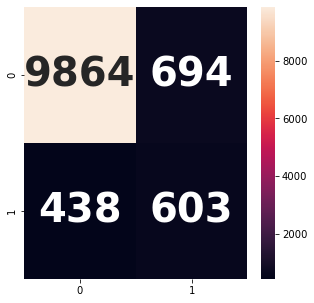

In [118]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [119]:
bin_class=pd.DataFrame({"Model":["Logistic regression","KNN","Decision Tree","Random Forest","XGboost"],
                       "auroc":[log_reg_auroc,KNN_auroc,dt_auroc,rf_auroc,xg_auroc]})

In [120]:
print("Models and their evaluations")
print("\n")
bin_class.sort_values(["auroc"],ascending=False)

Models and their evaluations




,Model,auroc
2,Decision Tree,0.765985
4,XGboost,0.756759
3,Random Forest,0.747599
0,Logistic regression,0.661489
1,KNN,0.658554


# Model Building With Caping Data

In [121]:
df3 = n_df.copy()

In [122]:
# Age 
low = df3['age'].quantile(0.25)
high = df3['age'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = high + 1.5 * iqr

df3['age'] = df3['age'].apply(lambda x: percentile_3 if x > percentile_3 else x)
df3['age'] = df3['age'].apply(lambda x: percentile_1 if x < percentile_1 else x)

# Duretion
low = df3['duration'].quantile(0.25)
high = df3['duration'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = high + 1.5 * iqr

df3['duration'] = df3['duration'].apply(lambda x: percentile_3 if x > percentile_3 else x)
df3['duration'] = df3['duration'].apply(lambda x: percentile_1 if x < percentile_1 else x)

# Num Calls
low = df3['num_calls'].quantile(0.25)
high = df3['num_calls'].quantile(0.75)
iqr = high-low

percentile_1 = low - 1.5 * iqr
percentile_3 = high + 1.5 * iqr

df3['num_calls'] = df3['num_calls'].apply(lambda x: percentile_3 if x > percentile_3 else x)
df3['num_calls'] = df3['num_calls'].apply(lambda x: percentile_1 if x < percentile_1 else x)

In [123]:
X =  df3.drop('y',axis = 1)
y = df3['y']

**Spliting The Data**

In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# Balance The Data And Model Building For Caping Data

In [125]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)

# Data Scaling

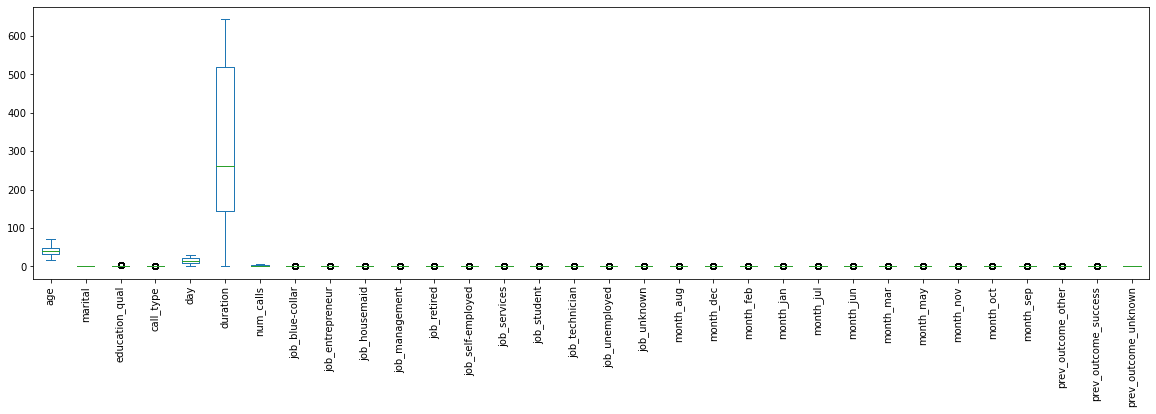

In [126]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()  #lets scale  the datasets

In [127]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [129]:
from sklearn.metrics import roc_auc_score
log_reg_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for logistic regression  :  ",round(log_reg_auroc,2))

auroc score for logistic regression  :   0.71


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

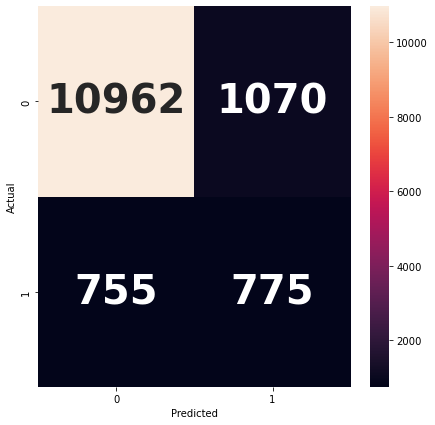

In [130]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d') 

# KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
#doing cross validation to identify best value of K 
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20]:  #for each k value finding the auroc 
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  trainAccuracy = roc_auc_score(y_train, knn.predict(X_train))
  print("K value  : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1 Train accuracy : 0.9999097342576546  cross val score :  0.9085658569396007
K value  :  2 Train accuracy : 0.9631896302715193  cross val score :  0.9091990434744638
K value  :  3 Train accuracy : 0.9518341998844598  cross val score :  0.9121045060851735
K value  :  4 Train accuracy : 0.9439991334488734  cross val score :  0.9108236019873518
K value  :  5 Train accuracy : 0.9398469093009821  cross val score :  0.9115629083694682
K value  :  6 Train accuracy : 0.9366153957250144  cross val score :  0.9106248016200189
K value  :  7 Train accuracy : 0.9338532640092433  cross val score :  0.9094869266370462
K value  :  8 Train accuracy : 0.9313438763720393  cross val score :  0.9093430371966946
K value  :  9 Train accuracy : 0.9298635181975736  cross val score :  0.9091439533130028
K value  :  10 Train accuracy : 0.9283470537261698  cross val score :  0.9091263133813856
K value  :  20 Train accuracy : 0.9200606585788562  cross val score :  0.9067431270094628


In [133]:
# at k=10 we get good cross val score 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)  #initialized 
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [134]:
y_pred=classifier.predict(X_test)

In [135]:
roc_auc_score(y_test,y_pred)

0.6638803061118064

In [136]:
from sklearn.metrics import roc_auc_score
KNN_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for KNN  :  ",round(KNN_auroc,2))

auroc score for KNN  :   0.66


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

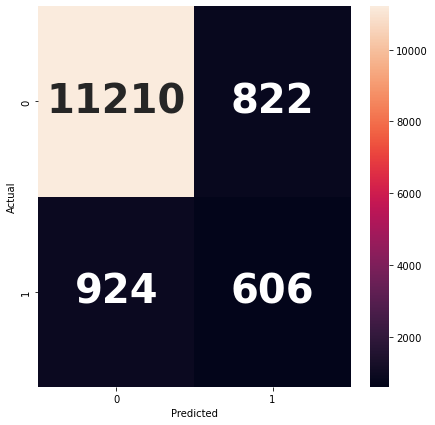

In [137]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Decision Tree

In [138]:
from sklearn.metrics import accuracy_score

In [139]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7270725014442518  Cross val score :  0.7250686077000437
Depth  :  2  Training Accuracy :  0.7559755921432698  Cross val score :  0.747888513546542
Depth  :  3  Training Accuracy :  0.8172840843443097  Cross val score :  0.8175559293047071
Depth  :  4  Training Accuracy :  0.8296143847487002  Cross val score :  0.8264565669232219
Depth  :  5  Training Accuracy :  0.8461691218948584  Cross val score :  0.8370719408096055
Depth  :  6  Training Accuracy :  0.8693854708261122  Cross val score :  0.858808462213787
Depth  :  7  Training Accuracy :  0.8910673021374929  Cross val score :  0.8809957387817139
Depth  :  8  Training Accuracy :  0.9049682264586943  Cross val score :  0.8955648981980742
Depth  :  9  Training Accuracy :  0.9156917966493356  Cross val score :  0.9014325886086384
Depth  :  10  Training Accuracy :  0.9257835066435586  Cross val score :  0.9071916857361291


In [140]:
#lets us fit the model with max_depth =5 it seems more of genralised model   in depth>5 we see overfitted model 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [141]:
y_pred = dt.predict(X_test)

In [142]:
from sklearn.metrics import roc_auc_score
dt_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for decision tree  :  ",round(dt_auroc,3))

auroc score for decision tree  :   0.777


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

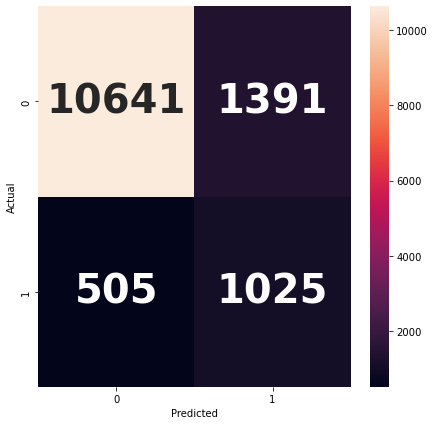

In [143]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [145]:
y_pred= rf.predict(X_test)

In [146]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, rf.predict(X_train)) # this is useless information - i am showing to prove a point
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8162911611785095  Cross val score :  0.8093426526572653
Depth  :  2  Training Accuracy :  0.8182770075101097  Cross val score :  0.8341843918704454
Depth  :  3  Training Accuracy :  0.8620378393991911  Cross val score :  0.852887043823808
Depth  :  4  Training Accuracy :  0.876552570768342  Cross val score :  0.8680701106626266
Depth  :  5  Training Accuracy :  0.8859041016753322  Cross val score :  0.8799850062210659
Depth  :  6  Training Accuracy :  0.8910311958405546  Cross val score :  0.8891202780676307
Depth  :  7  Training Accuracy :  0.9025852108607741  Cross val score :  0.8955653088079734
Depth  :  8  Training Accuracy :  0.9129838243789717  Cross val score :  0.9021187177500142
Depth  :  9  Training Accuracy :  0.9202953495089544  Cross val score :  0.9082027148483709
Depth  :  10  Training Accuracy :  0.9273360774119006  Cross val score :  0.911290191702682


In [147]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [148]:
y_pred=rf.predict(X_test)

In [149]:
from sklearn.metrics import roc_auc_score
rf_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc,2))

auroc score for random forest classifier   :   0.78


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

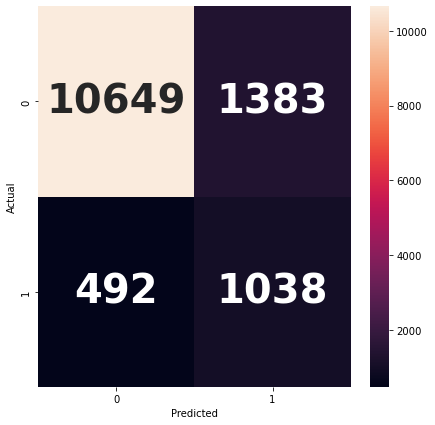

In [150]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [151]:
input_cols=df.columns.to_list()[0:10]

In [152]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(input_cols, importances)]  #input_cols=column names as list

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: day                  Importance: 0.36
Variable: education_qual       Importance: 0.07
Variable: month                Importance: 0.06
Variable: duration             Importance: 0.05
Variable: age                  Importance: 0.02
Variable: job                  Importance: 0.01
Variable: marital              Importance: 0.01
Variable: call_type            Importance: 0.01
Variable: num_calls            Importance: 0.0
Variable: prev_outcome         Importance: 0.0


In [153]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [154]:
y_pred=rf.predict(X_test)

In [155]:
from sklearn.metrics import roc_auc_score
rf_auroc1=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc1,2))

auroc score for random forest classifier   :   0.78


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

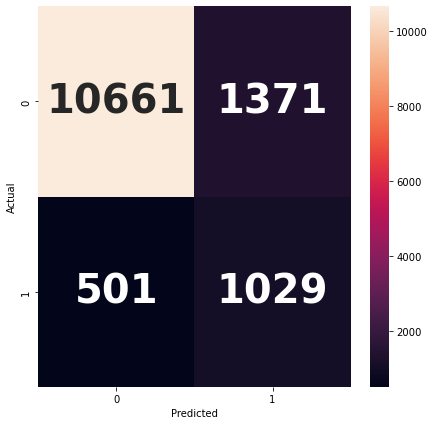

In [156]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# XG Boost

In [157]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.15,0.2,0.5,0.7,1]:  #cross validation for learning rate 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train)
  print("Learning rate : ", lr," Train score : ", roc_auc_score(y_train, model.predict(X_train))," Cross-Val score : ", np.mean(cross_val_score(model,X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.8943710283073368  Cross-Val score :  0.8882171090065001
Learning rate :  0.02  Train score :  0.9117381571346043  Cross-Val score :  0.9035085670822516
Learning rate :  0.03  Train score :  0.923310225303293  Cross-Val score :  0.91356458274539
Learning rate :  0.04  Train score :  0.9297010398613518  Cross-Val score :  0.9181866782506456
Learning rate :  0.05  Train score :  0.9333838821490467  Cross-Val score :  0.9201006841543033
Learning rate :  0.1  Train score :  0.9437102830733679  Cross-Val score :  0.9239829779385167
Learning rate :  0.11  Train score :  0.9451003755054881  Cross-Val score :  0.9238929142418415
Learning rate :  0.12  Train score :  0.9469598497978048  Cross-Val score :  0.9246511347497854
Learning rate :  0.15  Train score :  0.9502996822645869  Cross-Val score :  0.9242723503766858
Learning rate :  0.2  Train score :  0.9561127960716349  Cross-Val score :  0.9260778607615314
Learning rate :  0.5  Train score :  0.972378

In [158]:
model = xgb.XGBClassifier(learning_rate =0.08, n_estimators=100)  #at lr=0.08 model is more generalized
model.fit(X_train,y_train) #train the model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [159]:
y_pred=model.predict(X_test)

In [160]:
from sklearn.metrics import roc_auc_score
xg_auroc=roc_auc_score(y_test,y_pred)  #handles predicted probaility 
print("auroc score for xg boost   :  ",round(xg_auroc,2))  #we get 0.99 very good auroc score

auroc score for xg boost   :   0.76


In [161]:
from sklearn.metrics import  confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

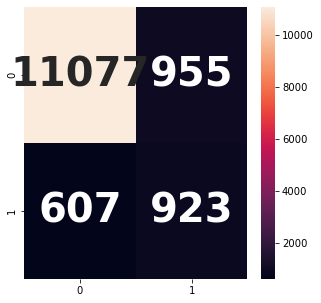

In [162]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [163]:
bin_class=pd.DataFrame({"Model":["Logistic regression","KNN","Decision Tree","Random Forest","XGboost"],
                       "auroc":[log_reg_auroc,KNN_auroc,dt_auroc,rf_auroc,xg_auroc]})

In [164]:
print("Models and their evaluations")
print("\n")
bin_class.sort_values(["auroc"],ascending=False)

Models and their evaluations




,Model,auroc
3,Random Forest,0.781744
2,Decision Tree,0.777163
4,XGboost,0.761948
0,Logistic regression,0.708803
1,KNN,0.663880


# Model Building With Important Features

In [165]:
new_df = n_df[['age','education_qual','duration','day','month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep','y']]
new_df.head()

,age,education_qual,duration,day,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,58,1,261,5,0,0,0,0,0,0,0,1,0,0,0,0
1,44,0,151,5,0,0,0,0,0,0,0,1,0,0,0,0
2,33,0,76,5,0,0,0,0,0,0,0,1,0,0,0,0
3,47,3,92,5,0,0,0,0,0,0,0,1,0,0,0,0
4,33,3,198,5,0,0,0,0,0,0,0,1,0,0,0,0


In [166]:
X = new_df.drop('y',axis = 1)
y = new_df['y']

**Spliting The Data**

In [167]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# Balance Data And Model Building With  Important Features

In [168]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='all')
X_train, y_train = smt.fit_resample(X_train, y_train)

# Data Scaling

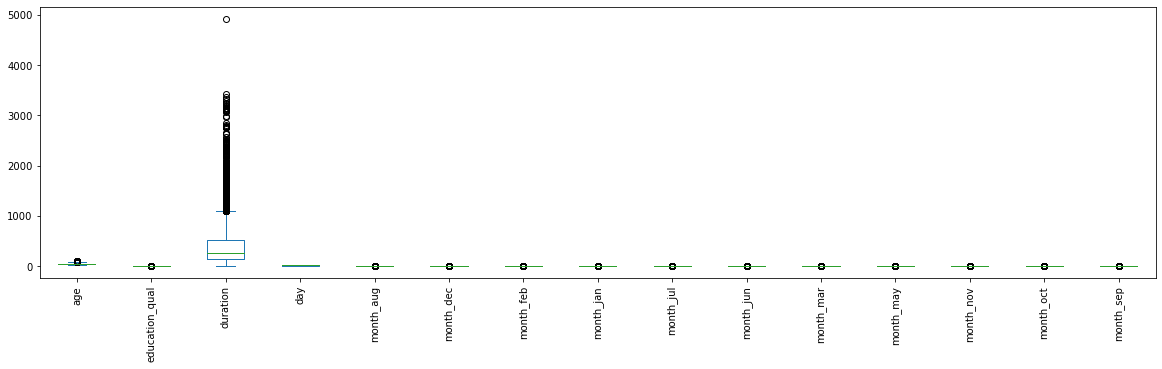

In [169]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()  #lets scale  the datasets

In [170]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [172]:
from sklearn.metrics import roc_auc_score
log_reg_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for logistic regression  :  ",round(log_reg_auroc,2))

auroc score for logistic regression  :   0.69


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

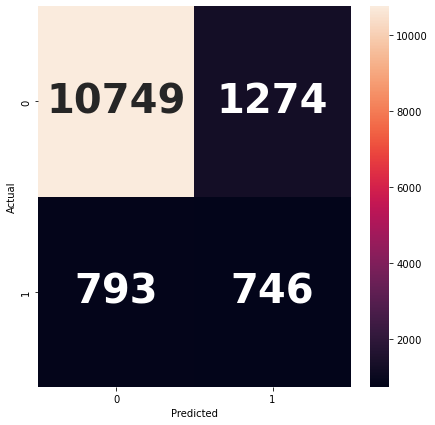

In [173]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d') 

# KNN

In [174]:
from sklearn.neighbors import KNeighborsClassifier

In [175]:
#doing cross validation to identify best value of K 
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20]:  #for each k value finding the auroc 
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  trainAccuracy = roc_auc_score(y_train, knn.predict(X_train))
  print("K value  : " , i,"Train accuracy :",trainAccuracy, " cross val score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1 Train accuracy : 0.99966838614591  cross val score :  0.903002947678703
K value  :  2 Train accuracy : 0.962011790714812  cross val score :  0.8992078113485631
K value  :  3 Train accuracy : 0.9481577008106117  cross val score :  0.905840088430361
K value  :  4 Train accuracy : 0.9402726602800295  cross val score :  0.903168754605748
K value  :  5 Train accuracy : 0.9342667649226234  cross val score :  0.9034082535003684
K value  :  6 Train accuracy : 0.9303242446573324  cross val score :  0.901436993367723
K value  :  7 Train accuracy : 0.9265106853352985  cross val score :  0.9011606484893147
K value  :  8 Train accuracy : 0.9239683124539426  cross val score :  0.9009211495946943
K value  :  9 Train accuracy : 0.9215733235077376  cross val score :  0.9009579955784821
K value  :  10 Train accuracy : 0.9196389093588799  cross val score :  0.9004789977892409
K value  :  20 Train accuracy : 0.9098010316875461  cross val score :  0.8958548268238763


In [176]:
# at k=10 we get good cross val score 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)  #initialized 
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [177]:
y_pred=classifier.predict(X_test)

In [178]:
roc_auc_score(y_test,y_pred)

0.7089651970392248

In [179]:
from sklearn.metrics import roc_auc_score
KNN_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for KNN  :  ",round(KNN_auroc,2))

auroc score for KNN  :   0.71


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

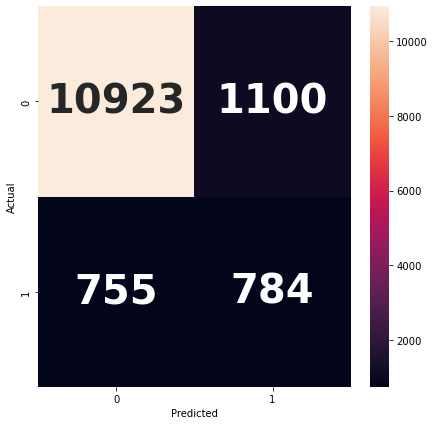

In [180]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Decision Tree

In [181]:
from sklearn.metrics import accuracy_score

In [182]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7283529845246868  Cross val score :  0.7272660280029477
Depth  :  2  Training Accuracy :  0.749060427413412  Cross val score :  0.7490604274134119
Depth  :  3  Training Accuracy :  0.7720154753131908  Cross val score :  0.7724023581429624
Depth  :  4  Training Accuracy :  0.7992446573323508  Cross val score :  0.7982498157700811
Depth  :  5  Training Accuracy :  0.8262159174649963  Cross val score :  0.8237288135593219
Depth  :  6  Training Accuracy :  0.8566322770817981  Cross val score :  0.8531319086219602
Depth  :  7  Training Accuracy :  0.8745394252026529  Cross val score :  0.86774134119381
Depth  :  8  Training Accuracy :  0.893680913780398  Cross val score :  0.8868828297715549
Depth  :  9  Training Accuracy :  0.908695652173913  Cross val score :  0.8971075902726604
Depth  :  10  Training Accuracy :  0.9165806927044953  Cross val score :  0.8992815033161385


In [183]:
#lets us fit the model with max_depth =5 it seems more of genralised model   in depth>5 we see overfitted model 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [184]:
y_pred = dt.predict(X_test)

In [185]:
from sklearn.metrics import roc_auc_score
dt_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for decision tree  :  ",round(dt_auroc,3))

auroc score for decision tree  :   0.758


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

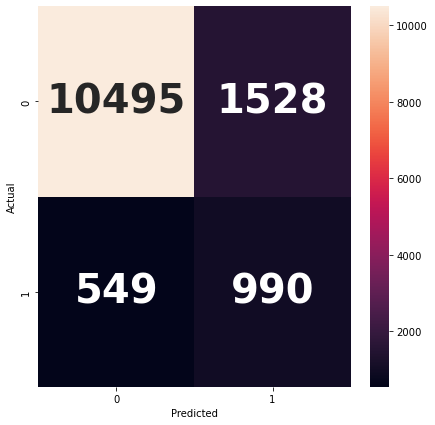

In [186]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# Random Forest

In [187]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [188]:
y_pred= rf.predict(X_test)

In [189]:
#doing cross validation to get best value of max _depth to prevent overfitted model 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  rf.fit(X_train, y_train) # the model is trained
  trainAccuracy = roc_auc_score(y_train, rf.predict(X_train)) # this is useless information - i am showing to prove a point
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100,max_features="sqrt")   # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7870854826823876  Cross val score :  0.7634303610906412
Depth  :  2  Training Accuracy :  0.8025792188651438  Cross val score :  0.8011238025055268
Depth  :  3  Training Accuracy :  0.8269712601326455  Cross val score :  0.8199152542372883
Depth  :  4  Training Accuracy :  0.8488393515106853  Cross val score :  0.8338430361090641
Depth  :  5  Training Accuracy :  0.8692888725128961  Cross val score :  0.8564664701547532
Depth  :  6  Training Accuracy :  0.8799557848194546  Cross val score :  0.8773397199705231
Depth  :  7  Training Accuracy :  0.8939572586588062  Cross val score :  0.8851142225497421
Depth  :  8  Training Accuracy :  0.9042188651436994  Cross val score :  0.8950257921886514
Depth  :  9  Training Accuracy :  0.9138172439204126  Cross val score :  0.8999078850405307
Depth  :  10  Training Accuracy :  0.9184966838614592  Cross val score :  0.9040346352247607


In [190]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [191]:
y_pred=rf.predict(X_test)

In [192]:
from sklearn.metrics import roc_auc_score
rf_auroc=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc,2))

auroc score for random forest classifier   :   0.77


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

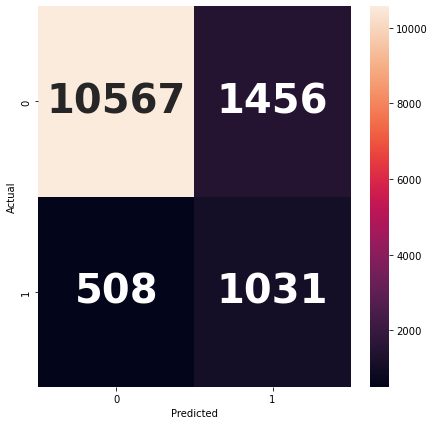

In [193]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [194]:
input_cols=df.columns.to_list()[0:10]

In [195]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(input_cols, importances)]  #input_cols=column names as list

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: marital              Importance: 0.41
Variable: num_calls            Importance: 0.09
Variable: prev_outcome         Importance: 0.07
Variable: call_type            Importance: 0.06
Variable: age                  Importance: 0.04
Variable: job                  Importance: 0.03
Variable: education_qual       Importance: 0.03
Variable: month                Importance: 0.02
Variable: duration             Importance: 0.02
Variable: day                  Importance: 0.0


In [196]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=8,n_estimators=100,max_features="sqrt")    #max_depth=log(no of features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [197]:
y_pred=rf.predict(X_test)

In [198]:
from sklearn.metrics import roc_auc_score
rf_auroc1=roc_auc_score(y_test,y_pred)
print("auroc score for random forest classifier   :  ",round(rf_auroc1,2))

auroc score for random forest classifier   :   0.78


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

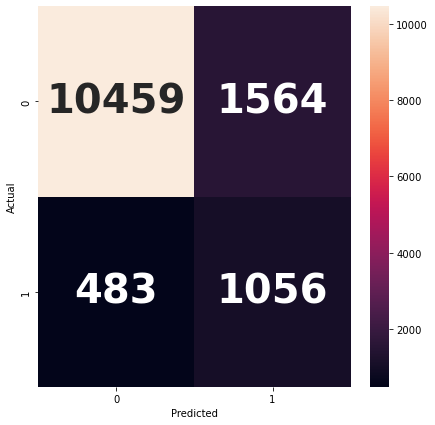

In [199]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

# XG Boost

In [200]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.15,0.2,0.5,0.7,1]:  #cross validation for learning rate 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train)
  print("Learning rate : ", lr," Train score : ", roc_auc_score(y_train, model.predict(X_train))," Cross-Val score : ", np.mean(cross_val_score(model,X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.873084008843036  Cross-Val score :  0.868846720707443
Learning rate :  0.02  Train score :  0.9015659543109801  Cross-Val score :  0.8948231392778186
Learning rate :  0.03  Train score :  0.9080508474576271  Cross-Val score :  0.9009579955784821
Learning rate :  0.04  Train score :  0.9104089904200442  Cross-Val score :  0.9022476050110537
Learning rate :  0.05  Train score :  0.9125092114959469  Cross-Val score :  0.9042925571112749
Learning rate :  0.1  Train score :  0.9204495210022108  Cross-Val score :  0.9067428150331613
Learning rate :  0.11  Train score :  0.9215549005158438  Cross-Val score :  0.9074244657332351
Learning rate :  0.12  Train score :  0.9222549742078113  Cross-Val score :  0.908069270449521
Learning rate :  0.15  Train score :  0.9259948415622699  Cross-Val score :  0.909303610906411
Learning rate :  0.2  Train score :  0.9296978629329403  Cross-Val score :  0.9109985261606486
Learning rate :  0.5  Train score :  0.9531503

In [201]:
model = xgb.XGBClassifier(learning_rate =0.08, n_estimators=100)  #at lr=0.08 model is more generalized
model.fit(X_train,y_train) #train the model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [202]:
y_pred=model.predict(X_test)

In [203]:
from sklearn.metrics import roc_auc_score
xg_auroc=roc_auc_score(y_test,y_pred)  #handles predicted probaility 
print("auroc score for xg boost   :  ",round(xg_auroc,2))  #we get 0.99 very good auroc score

auroc score for xg boost   :   0.77


In [204]:
from sklearn.metrics import  confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

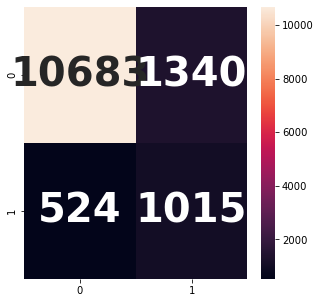

In [205]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 40, "weight": "bold"}, fmt='d')

In [206]:
bin_class=pd.DataFrame({"Model":["Logistic regression","KNN","Decision Tree","Random Forest","XGboost"],
                       "auroc":[log_reg_auroc,KNN_auroc,dt_auroc,rf_auroc,xg_auroc]})

In [207]:
print("Models and their evaluations")
print("\n")
bin_class.sort_values(["auroc"],ascending=False)

Models and their evaluations




,Model,auroc
3,Random Forest,0.774407
4,XGboost,0.774033
2,Decision Tree,0.758093
1,KNN,0.708965
0,Logistic regression,0.689383


**We Can See That Random Forest Is Performing Well Compared To Other ML Models, So We Will Take Random Forest As Our Final Model**

**Thank You :)**